## Retail Project

In [1]:
import numpy as np
import pandas as pd
import nltk

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read
data = pd.ExcelFile("retail dataset.xlsx")
df = data.parse("Sheet1", header=1)
df = df.drop(["Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21","Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26"], axis = 1)

## PreProcessing

In [3]:
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

ps = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

In [4]:
def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ')
    words = tokenizer.tokenize(txt)
    words = [w for w in words if not w in stop_words]
    words = [ps.stem(w) for w in words] #Stemmed version
    return words

## Functions

In [5]:
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

In [6]:
def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    print(rslt)

In [7]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [8]:
from os import path
from PIL import Image

# Model = np.array(Image.open("model.png"))

# Failed attempted at adding a form to wordcloud

In [9]:
# https://www.kaggle.com/longdoan/word-cloud-with-python
# https://github.com/amueller/word_cloud/issues/134
# https://amueller.github.io/word_cloud/auto_examples/masked.html

def cloud(text):
    mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
    mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 

    stopwords = set(STOPWORDS) # Redundant
    
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))

    print(wordcloud)

    fig = plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    #fig.savefig("word1.png", dpi=900)

## Word Distribution and Word Cloud

         Frequency
Word              
dress        10969
love         10634
fit          10613
size          9809
look          7935
wear          7487
top           7468
color         6727
like          6711
great         5849
5             5097
order         4389
would         4366
small         4232
fabric        4167
perfect       3736
littl         3635
nice          3572
realli        3451
flatter       3437
None


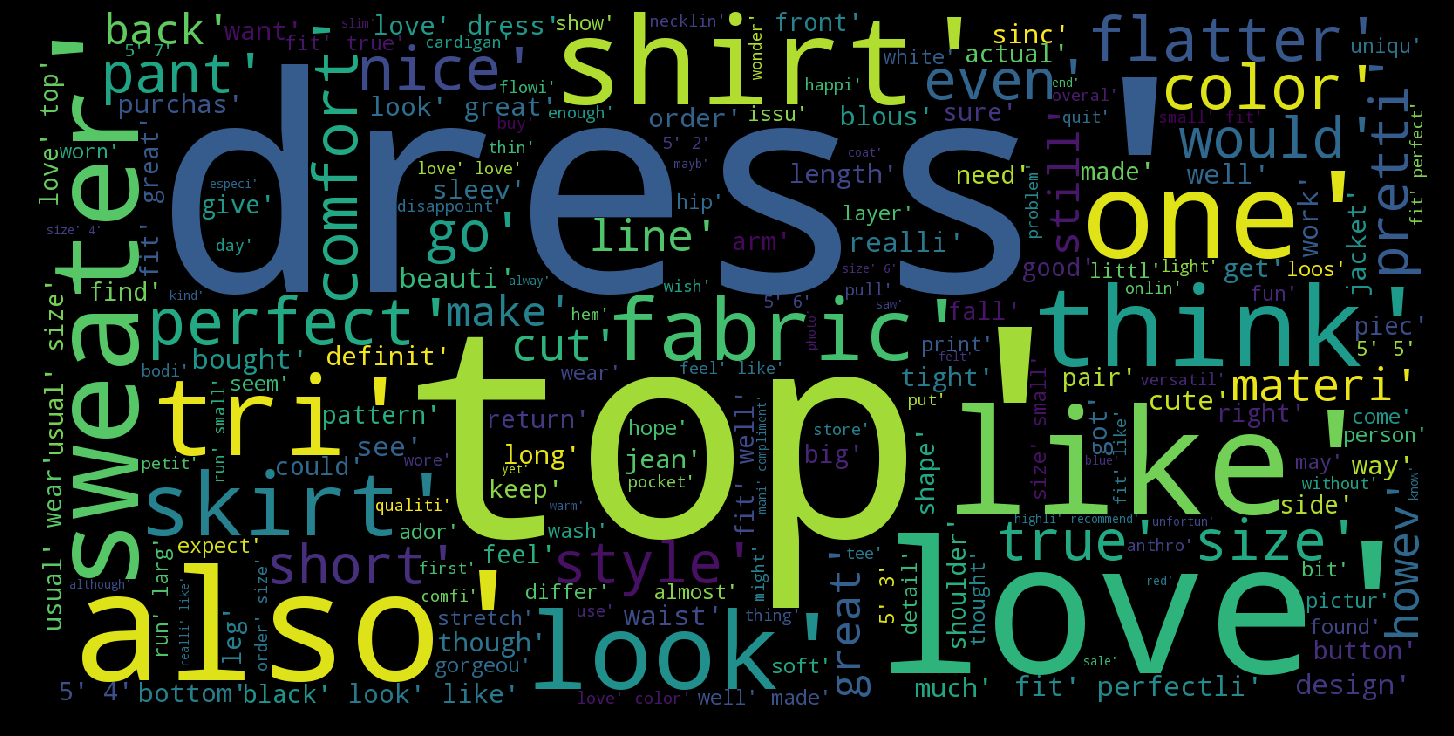

None
None


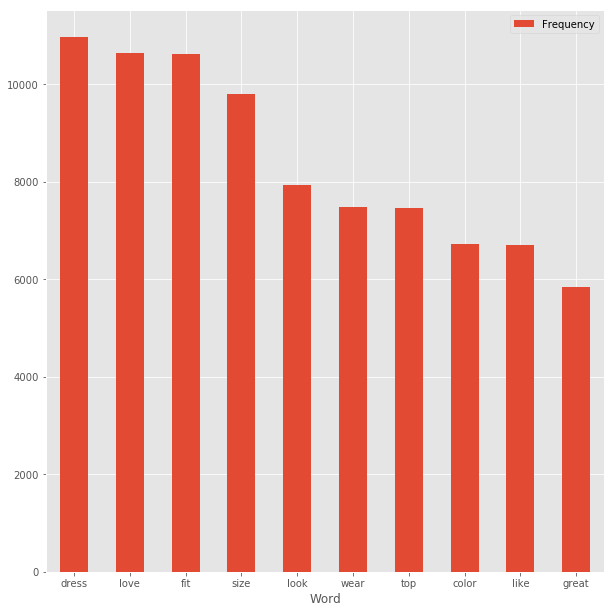

In [10]:
# Highly Raited
out = preprocessing(df[df.RATING >= 3]['REVIEW_TEXT'])
print(wordfreq(out,20))
print(cloud(out))
print(wordfreqviz(out,10))

        Frequency
Word             
look         1419
dress        1218
like         1164
size          912
top           907
fit           899
love          761
would         743
fabric        726
order         625
back          615
wear          588
color         573
small         521
return        512
realli        474
shirt         468
5             453
tri           440
materi        438
None


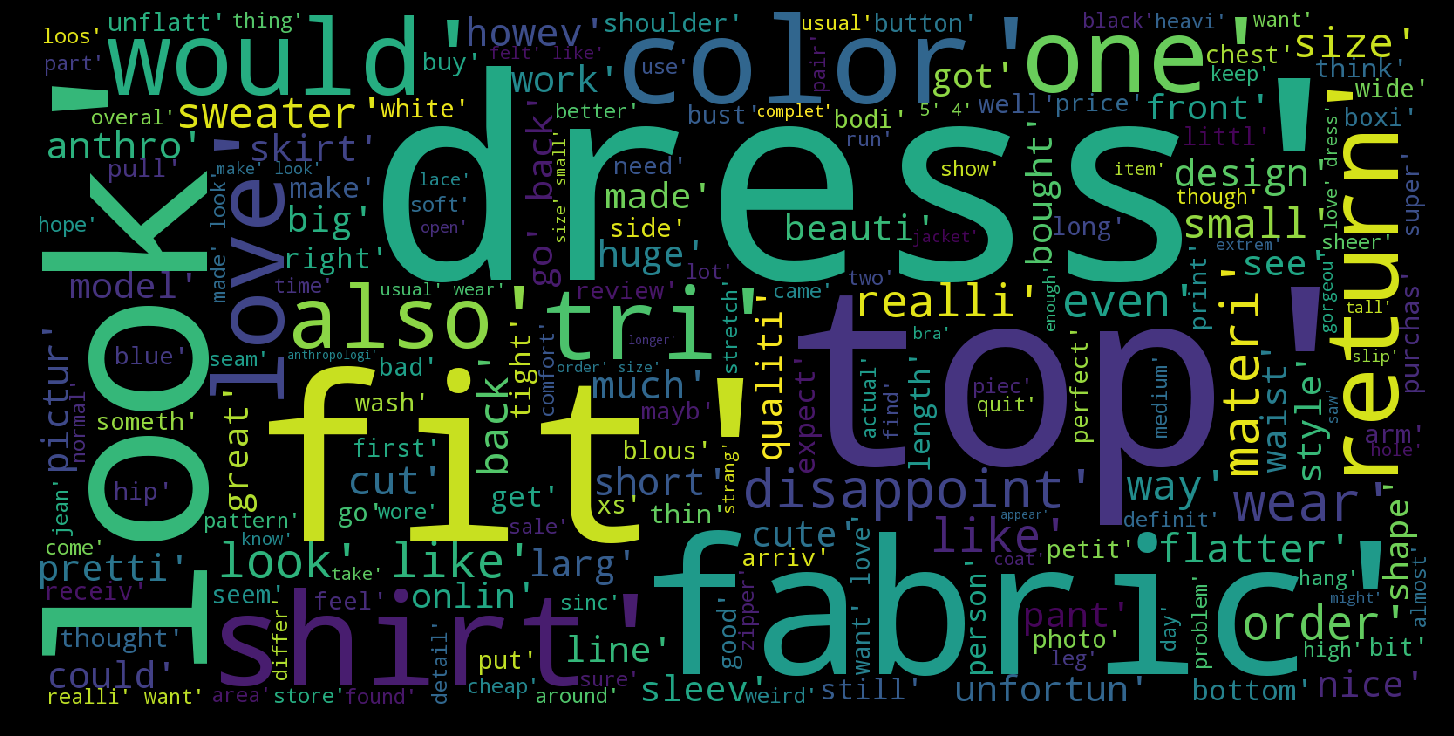

None
None


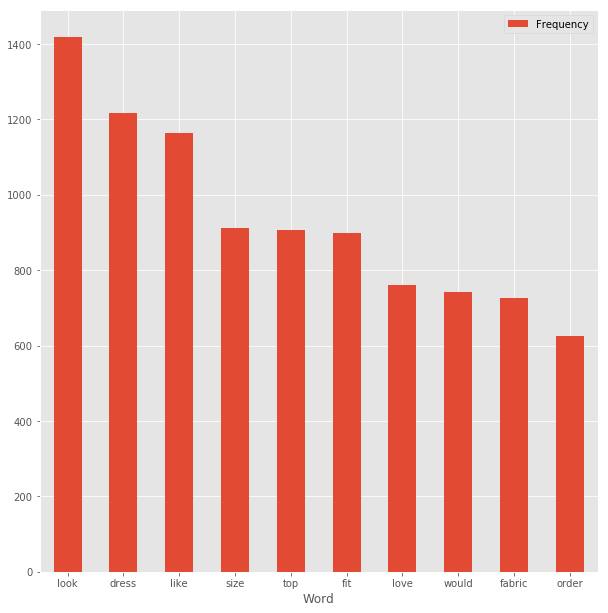

In [11]:
# Low Raited
out = preprocessing(df[df.RATING < 3]['REVIEW_TEXT'])
print(wordfreq(out,20))
print(cloud(out))
print(wordfreqviz(out,10))

In [12]:
df.head()

,STERLINGEXTERNALALIAS,AGE,IID,REVIEW_ID,TITLE,REVIEW_TEXT,RATING,RATING_RANGE,RECOMMENDED_IND,NUM_FEEDBACKS,NUM_POSITIVE_FEEDBACKS,NUM_NEGATIVE_FEEDBACKS,DIVISION_ID,DIVISION_NAME,DEPARTMENT_ID,DEPARTMENT_NAME,CLASS_ID,CLASS_NAME
0,40175747,33,100008000000000,73990099,NaN,absolutely wonderful - silky and sexy and comf...,4,5,1,0,0,0,42.0,ANTHRO INTIMATES (NA),414.0,ANTHRO. WOMEN'S INTIMATE (NA),4140.0,INTIMATES - ANTHRO (NA)
1,4130200000000,34,100000000000000,67591147,NaN,Love this dress! It's sooo pretty. I happene...,5,5,1,4,4,0,41.0,ANTHRO. WOMEN'S DIVISION (NA),413.0,ANTHRO. WOMEN'S OTHER (NA),4130.0,DRESSES - ANTHRO. (NA)
2,4130080000000,60,100000000000000,56579841,Some major design flaws,I had such high hopes for this dress and reall...,3,5,0,0,0,0,41.0,ANTHRO. WOMEN'S DIVISION (NA),413.0,ANTHRO. WOMEN'S OTHER (NA),4130.0,DRESSES - ANTHRO. (NA)
3,4123200000000,50,100001000000000,56445604,My Favorite Buy!,"I love, love, love this jumpsuit. It's fun, fl...",5,5,1,0,0,0,49.0,ANTHRO. MISC. DIVISION (NA),492.0,PETITES (NA),4927.0,PANTS - PETITES (NA)
4,4110530000000,47,100001000000000,73214993,Flattering shirt,This shirt is very flattering to all due to th...,5,5,1,6,6,0,41.0,ANTHRO. WOMEN'S DIVISION (NA),411.0,ANTHRO. WOMEN'S TOPS (NA),4110.0,BLOUSES - ANTHRO. (NA)


## Week 7 +